# Welcome! Let's Discuss Dimensionality Reduction Techniques using Python & Sklearn

In this notebook, I'll walk through the dimensionality reduction techniques namely PCA, t-SNE and LDA. <br>
The dataset used is **Breast Cancer Winconsin Dataset**. Python Library Used -> **Sklearn**. <br>
## If you liked my work, please support my efforts my giving an UPVOTE & please add your valuable comments in the comment section.

### Setting up Dataset for the notebook

In [221]:
data_url = 'https://raw.githubusercontent.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv'

In [222]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [223]:
df = pd.read_csv(data_url)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [224]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


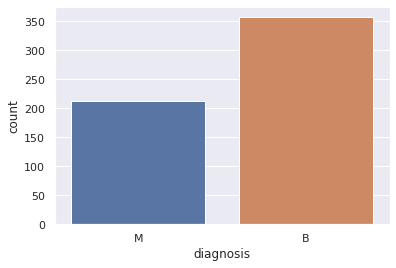

In [225]:
sns.countplot(df['diagnosis'])
plt.show()

In [226]:
df.drop(['Unnamed: 32'], axis = 1, inplace = True)

In [227]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [228]:
df.drop(['id'], axis = 1, inplace = True)

In [229]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [230]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [231]:
X = df.iloc[:, 1:].values
y = df['diagnosis'].values

In [232]:
X.shape

(569, 30)

In [233]:
y.shape

(569,)

In [234]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)

### Feature Scaling

In [235]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

We are ready to dive in to perform dimensionality reduction as our dataset is in the format we wanted.

# Let's Begin -> PCA, t-SNE & LDA

## PCA (Principal Component Analysis)

In [1]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 1)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

NameError: name 'X_train' is not defined

### Conclusion


PCA has no concern with the class labels. It summarizes the feature set without considering the output. PCA tries to find the directions of the maximum variance in the dataset. In a high cardinality feature set, there are possibilities of duplicate features which would add redundancy to the dataset, increase the computation cost and add unneccessary model complexity. **The role of PCA is to find such highly correlated or duplicate features and to come up with a new feature set where there is minimum correlation between the features or in other words feature set with maximum variance between the features.**

## t-SNE (t-Distributed Stochastic Neighbor)

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)

In [238]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [239]:
from sklearn.manifold import TSNE

In [240]:
tsne = TSNE(n_components = 2, random_state = 0)

In [241]:
tsne_obj = tsne.fit_transform(X_train)

In [242]:
tsne_df = pd.DataFrame({'X' : tsne_obj[:,0],
                       'Y' : tsne_obj[:,1],
                        'classification' : y_train
                       })

In [243]:
tsne_df.head()

,X,Y,classification
0,-12.207305,2.690072,B
1,-4.878841,15.956553,B
2,-0.523314,5.116486,B
3,-14.635404,6.286997,B
4,-13.784823,12.112716,B


In [244]:
tsne_df['classification'].value_counts()

B    290
M    165
Name: classification, dtype: int64

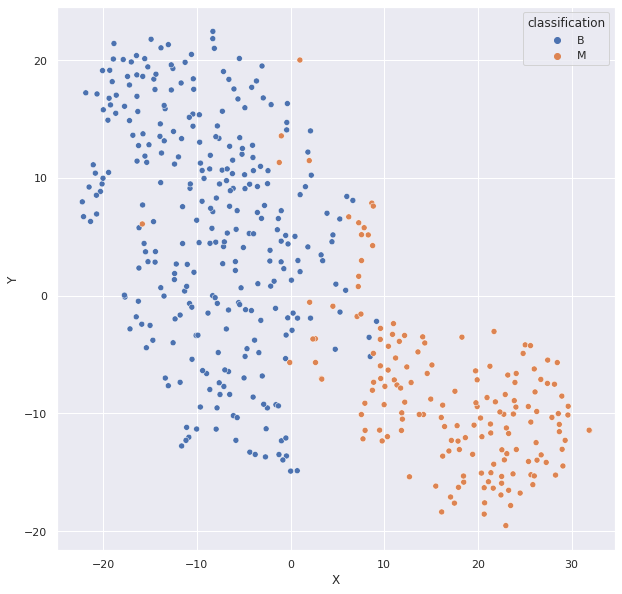

In [245]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'X', y = 'Y', data = tsne_df, hue=tsne_df['classification'])
plt.show()

We have obtained the plot of the data points but are unable to segregate. Let's introduce hue

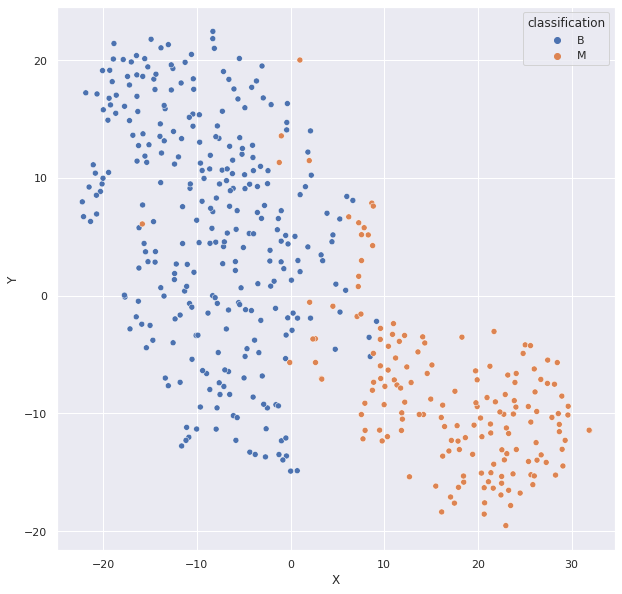

In [246]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = "X", y = 'Y', hue = 'classification', legend = 'full', data = tsne_df)
plt.show()

## LDA (Linear Discriminant Analysis)

### Performing LDA (Linear Discriminant Analysis)

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [248]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

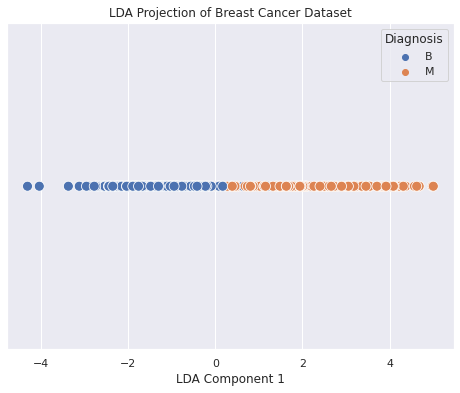

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for plotting
import pandas as pd
df_lda = pd.DataFrame({'LDA1': X_train[:, 0], 'Diagnosis': y_train})

# Plot using Seaborn
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_lda['LDA1'], y=[0] * len(df_lda), hue=df_lda['Diagnosis'], palette="deep", s=100)
plt.xlabel('LDA Component 1')
plt.title('LDA Projection of Breast Cancer Dataset')
plt.yticks([])  # Remove y-axis labels since it's 1D
plt.legend(title='Diagnosis')
plt.show()


# What's the difference from PCA?
LDA tries to reduce the dimensionality by taking into consideration the information that discriminates the output classes. LDA tries to find the decision boundary around each cluster of class. <br><br>
It projects the data points to new dimension in a way that the clusters are as seperate from each other as possible and individual elements within a class are as close to the centroid as possible. <br><br>
**In other words, the inter-class seperability is increased in LDA. Intra-class seperability is reduced.** <br>
The new dimensions are the linear discriminants of the feature set.